# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:

ID:

Team Mate name :

ID:

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 3 files . 




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.

cl

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [1]:
#########################begin code for Task 1-a
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data4 = pandas.read_csv('C:/Users/divya/Downloads/Project/wine-clustering.csv')
data4.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


Text(0, 0.5, 'WCSS')

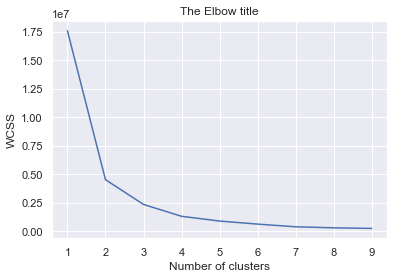

In [3]:
x = data4.iloc[:,0:13] # 1t for rows and second for columns

wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#1-a done (determining the k value by elbow method)

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
from sklearn.model_selection import train_test_split
x_training_data, x_test_data = train_test_split(data4, test_size = 0.3, random_state = 2022)
#1-b-1 completed
###################end code for Task 1-b-1

In [5]:
x_training_data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,14.19,1.59,2.48,16.5,108,3.30,3.93,0.32,1.86,8.70,1.23,2.82,1680
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
112,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740


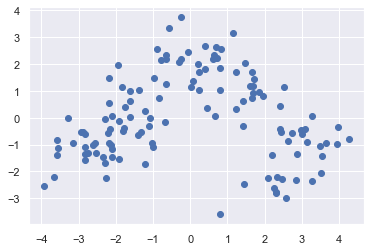

In [7]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create the KMeans model

#kmeans model creation
kmeans = KMeans(n_clusters = 2)
y_kmeans1 = kmeans.fit_predict(x_training_data) #both cluster center and cluster index in the fit_predict method 

#####################################cite

# Compute cluster centers and predict cluster index for each sample

y_kmeans1

# Model and fit the data to the PCA model

x_train_pca_St = StandardScaler().fit_transform(x_training_data)
pca = PCA(n_components=2)
principlecCom = pca.fit_transform(x_train_pca_St)

#Save components to a DataFrame
x_train_pca = pandas.DataFrame(principlecCom)

x = x_train_pca.iloc[:, 0]
y = x_train_pca.iloc[:, 1]

plt.scatter(x, y)

plt.show()


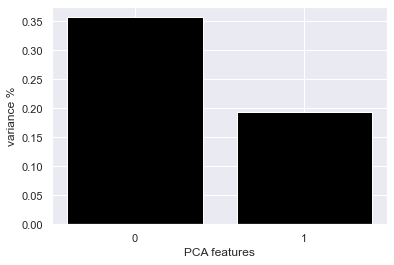

In [8]:
# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
# x = X_train_pca[:, 0]
# y = X_train_pca[:, 1]

#graph for PCA

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

###################end code for Task 1-b-2

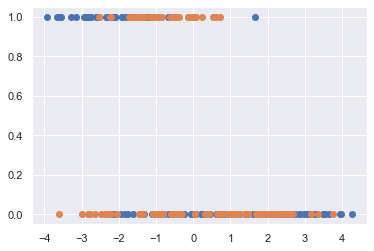

In [13]:
plt.scatter(x_train_pca[0],y_kmeans1) 
plt.scatter(x_train_pca[1],y_kmeans1)
plt.show()

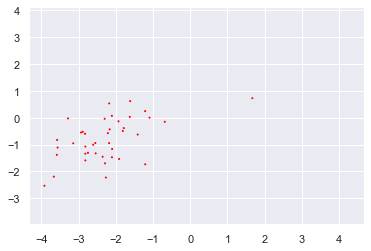

In [11]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], y_kmeans1, color='red')
plt.show()

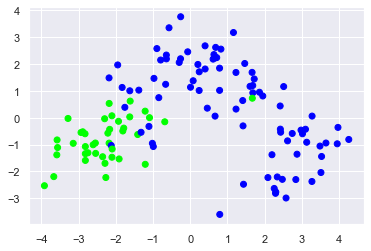

In [15]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1],c=y_kmeans1, cmap = 'brg')
plt.show()

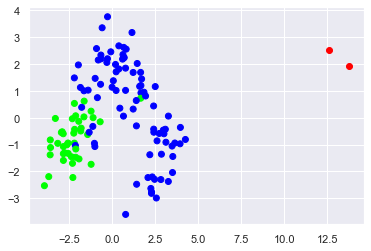

In [16]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1],c=y_kmeans1, cmap = 'brg')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red');
plt.show()

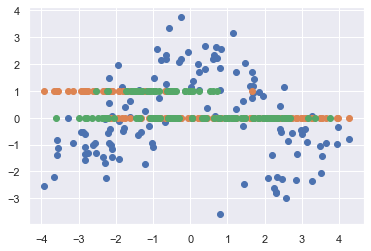

In [17]:
x = x_train_pca[0]
y = x_train_pca[1]

plt.scatter(x, y)
plt.scatter(x_train_pca[0],y_kmeans1)
plt.scatter(x_train_pca[1],y_kmeans1)

plt.show()


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

In [18]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
y_kmeans_test1 = kmeans.fit_predict(x_test_data)
y_kmeans_test1

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

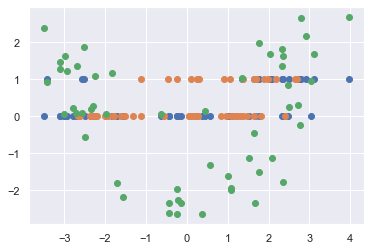

In [19]:
# Model and fit the data to the PCA model
#X_test_pca = None

x_test_pca_St = StandardScaler().fit_transform(x_test_data)
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
principlecCom1 = pca.fit_transform(x_test_pca_St)

# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)
#Save components to a DataFrame
x_test_pca = pandas.DataFrame(principlecCom1)

# x_train_pca
# x_train_pca[1]

x = x_test_pca[0]
y = x_test_pca[1]

plt.scatter(x_test_pca[0],y_kmeans_test1)
plt.scatter(x_test_pca[1],y_kmeans_test1)
plt.scatter(x, y)

plt.show()

#1-b-2 completed

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
# x = X_test_pca[:, 0]
# y = X_test_pca[:, 1]


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [ ]:
###################begin code for Task 1-b-4: Print out a confusion matrix
##As the clustering model contains unsupervised dataset, confusion matrix cannot be done.
###################end code for Task 1-b-4

# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.

In [20]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(x_training_data, metric='euclidean', n_jobs=1)
pdm_train = pairwise_distances(x_training_data, metric='cosine', n_jobs=1)
pdm_train = pairwise_distances(x_training_data, metric='manhattan', n_jobs=1)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
pred1 = cluster1.fit_predict(x_training_data)
f1_score_1 = f1_score(y_kmeans1, pred1)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
pred2 = cluster2.fit_predict(x_training_data)
f1_score_2 = f1_score(y_kmeans1, pred2)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
pred3 = cluster3.fit_predict(x_training_data)
f1_score_3 = f1_score(y_kmeans1, pred3)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
pred4 = cluster4.fit_predict(x_training_data)
f1_score_4 = f1_score(y_kmeans1, pred4)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
pred5 = cluster5.fit_predict(x_training_data)
f1_score_5 = f1_score(y_kmeans1, pred5)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
cluster6 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
pred6 = cluster6.fit_predict(x_training_data)
f1_score_6 = f1_score(y_kmeans1, pred6)

print("F1-score for complete linkage + cosine", f1_score_1)
print("F1-score for complete linkage + euclidean", f1_score_2)
print("F1-score for complete linkage + manhattan", f1_score_3)
print("F1-score for average linkage + cosine", f1_score_4)
print("F1-score for average linkage + euclidean", f1_score_5)
print("F1-score for average linkage + manhattan", f1_score_6)


###################end code for Task 2-a

F1-score for complete linkage + cosine 0.6349206349206349
F1-score for complete linkage + euclidean 0.6666666666666666
F1-score for complete linkage + manhattan 0.06250000000000001
F1-score for average linkage + cosine 0.0
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.0


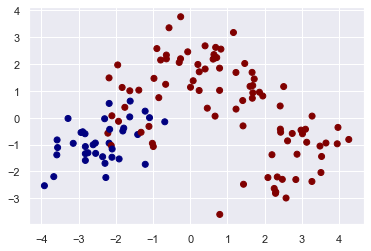

In [21]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# Visualize the predicted training labels versus actual training labels. 
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], c= pred2, cmap = 'jet')
plt.show()
###################end code for Task 2-b

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

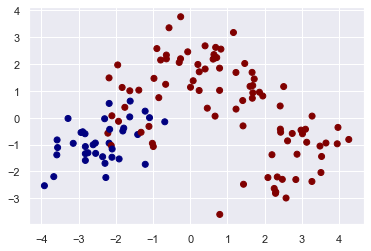

In [22]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 

plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], c= pred2, cmap = 'jet')
plt.show()

###################end code for Task 2-b

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

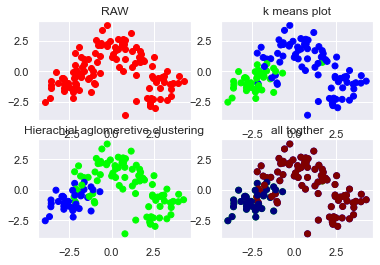

In [25]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans = KMeans(n_clusters = 2)
y_kmeans1 = kmeans.fit_predict(x_training_data) #cluster center and cluster index

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = pairwise_distances(x_training_data, metric='euclidean', n_jobs=1) #for euclidean metric
pdm_train = pairwise_distances(x_training_data, metric='cosine', n_jobs=1) #for cosine metric
pdm_train = pairwise_distances(x_training_data, metric='manhattan', n_jobs=1) #for manhattan metric

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
pred3 = cluster3.fit_predict(x_training_data)
f1_score_3 = f1_score(y_kmeans1, pred3)


### Visualize Clusters
#  Model and fit the data to the PCA model
x_train_pca_St = StandardScaler().fit_transform(x_training_data)
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
principlecCom = pca.fit_transform(x_train_pca_St)

#Save components to a DataFrame
x_train_pca = pandas.DataFrame(principlecCom)


# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
# task 3
#pred3, y_kmeans1, x_training_data.iloc[:, 0] + x_training_data.iloc[:, 1]
figure, axis = plt.subplots(2, 2)

# For x_training_data.iloc[:, 0] + x_training_data.iloc[:, 1]
axis[0, 0].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], color = 'red')
axis[0, 0].set_title("RAW")
  
# For y_kmeans1
axis[0, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=y_kmeans1, cmap = 'brg')
axis[0, 1].set_title("k means plot")
  
# For pred3
axis[1, 0].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=pred3, cmap = 'brg')
axis[1, 0].set_title("Hierachial aglomeretive clustering")

#for kmeans and hierachical aglomeretive clustering
axis[1, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=y_kmeans1, cmap = 'brg')
axis[1, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=pred2, cmap = 'jet')
axis[1, 1].set_title("all togther")

# Combine all the operations and display
plt.show()


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [26]:
###################begin code for Task 3-b

#This dataset is unsupervised so confusion metrix cann't be done.

###################end code for Task 3-b

# Model for dataset2 (CC General.csv)

In [168]:
data2 = pandas.read_csv('C:/Users/divya/Downloads/Project/CC GENERAL.csv')
data2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [170]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Text(0, 0.5, 'WCSS')

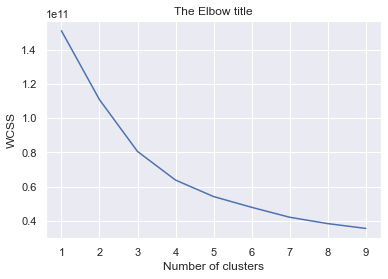

In [33]:
x = data2.iloc[:,1:18] # 1t for rows and second for columns

wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#1-a done (determining the k value by elbow method)

In [34]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data = train_test_split(data2, test_size = 0.3, random_state = 2022)
x_test_data
#1-b-1 completed

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6553,C16732,851.880648,0.909091,1476.70,934.59,542.11,903.935644,0.636364,0.454545,0.363636,0.272727,3,18,1200.0,2207.649199,613.130977,0.125000,11
692,C10719,908.354652,1.000000,231.35,0.00,231.35,944.183414,1.000000,0.000000,0.857143,0.142857,3,7,1000.0,161.975360,930.115009,0.000000,7
8877,C19118,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.000000,8
8210,C18430,482.028341,1.000000,106.47,0.00,106.47,0.000000,0.500000,0.000000,0.500000,0.000000,0,9,2500.0,184.166639,179.412181,0.000000,12
823,C10854,1392.773202,1.000000,221.61,221.61,0.00,0.000000,0.666667,0.666667,0.000000,0.000000,0,8,1700.0,369.345758,294.377252,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,C12150,1109.911791,1.000000,3150.00,2430.00,720.00,0.000000,1.000000,0.083333,1.000000,0.000000,0,14,2500.0,2694.972436,431.443631,0.083333,12
1091,C11126,5336.743176,1.000000,680.97,680.97,0.00,4037.626724,0.583333,0.583333,0.000000,0.416667,7,10,8500.0,1272.722158,1361.590608,0.000000,12
1434,C11482,2920.392514,1.000000,2673.73,1221.60,1452.13,5573.509394,1.000000,0.333333,1.000000,0.500000,13,59,15000.0,3319.325665,649.154698,0.000000,12
1178,C11222,1786.707643,1.000000,0.00,0.00,0.00,1835.162486,0.000000,0.000000,0.000000,0.250000,3,0,3000.0,1612.796944,419.392234,0.000000,12


In [35]:
x_training_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2022,C12085,1193.434312,1.000000,689.40,689.40,0.00,0.000000,1.000000,1.00,0.000000,0.000000,0,12,3500.0,328.171066,328.045032,0.000000,12
6954,C17143,26.800912,1.000000,163.20,0.00,163.20,0.000000,0.750000,0.00,0.750000,0.000000,0,9,3000.0,144.275838,130.672307,0.000000,12
3065,C13154,1207.886609,1.000000,143.00,0.00,143.00,1358.395174,0.166667,0.00,0.083333,0.166667,2,2,3000.0,398.257086,235.957305,0.000000,12
2052,C12116,8.258214,0.545455,92.46,0.00,92.46,0.000000,0.500000,0.00,0.416667,0.000000,0,6,300.0,127.082375,93.717243,0.750000,12
6744,C16932,528.917839,1.000000,647.69,483.59,164.10,0.000000,0.666667,0.25,0.333333,0.000000,0,12,1000.0,390.696467,213.744956,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6384,C16559,287.787967,1.000000,0.00,0.00,0.00,19.464101,0.000000,0.00,0.000000,0.083333,1,0,300.0,104.919187,346.608792,0.000000,12
4720,C14849,7404.850748,1.000000,0.00,0.00,0.00,12405.294500,0.000000,0.00,0.000000,0.500000,13,0,11500.0,13956.718730,1633.855260,0.083333,12
173,C10179,2187.732265,0.857143,0.00,0.00,0.00,3905.326256,0.000000,0.00,0.000000,0.285714,9,0,3000.0,1423.788603,461.365626,0.200000,7
1244,C11288,1739.666192,1.000000,0.00,0.00,0.00,2878.737758,0.000000,0.00,0.000000,0.333333,7,0,4500.0,5130.543752,531.071616,0.083333,12


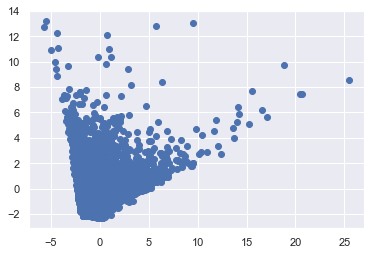

In [36]:
x = x_training_data.iloc[:,1:18] # 1t for rows and second for columns
x
#kmeans model creation
kmeans = KMeans(n_clusters = 2)
y_kmeans1 = kmeans.fit_predict(x)
y_kmeans1 #cluster center and cluster index

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train_pca_St = StandardScaler().fit_transform(x)
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
principlecCom = pca.fit_transform(x_train_pca_St)

#Save components to a DataFrame
x_train_pca = pandas.DataFrame(principlecCom)

# x_train_pca
# x_train_pca[1]

x = x_train_pca.iloc[:, 0]
y = x_train_pca.iloc[:, 1]

plt.scatter(x, y)

plt.show()


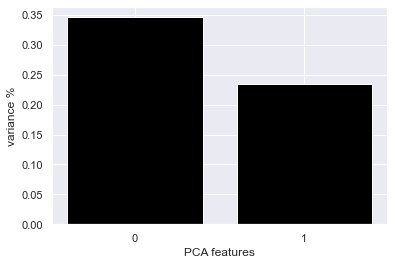

In [38]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

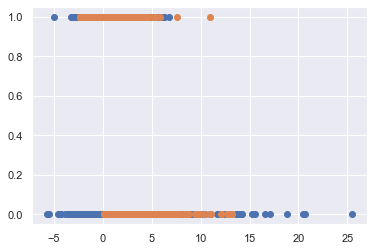

In [39]:
plt.scatter(x_train_pca[0],y_kmeans1)
plt.scatter(x_train_pca[1],y_kmeans1)
plt.show()

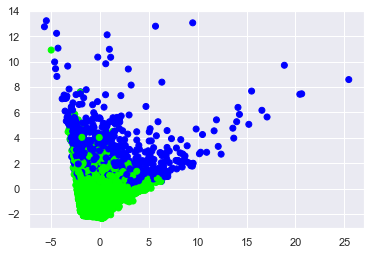

In [40]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1],c=y_kmeans1, cmap = 'brg')
plt.show()

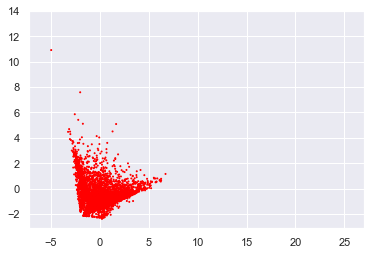

In [41]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], y_kmeans1, color='red')
plt.show()

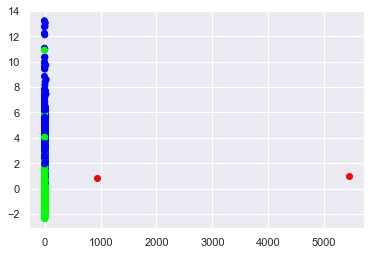

In [42]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1],c=y_kmeans1, cmap = 'brg')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red');
plt.show()

In [43]:
y = x_test_data.iloc[:,1:18] # 1t for rows and second for columns
y

y_kmeans_test1 = kmeans.fit_predict(y)
y_kmeans_test1

array([0, 0, 0, ..., 1, 0, 0])

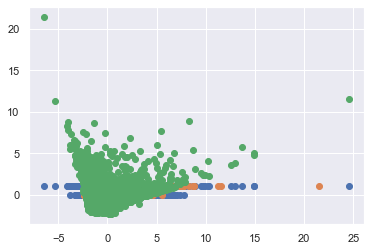

In [44]:
x_test_pca_St = StandardScaler().fit_transform(y)
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
principlecCom1 = pca.fit_transform(x_test_pca_St)

# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)
#Save components to a DataFrame
x_test_pca = pandas.DataFrame(principlecCom1)

# x_train_pca
# x_train_pca[1]

x = x_test_pca[0]
y = x_test_pca[1]

plt.scatter(x_test_pca[0],y_kmeans_test1)
plt.scatter(x_test_pca[1],y_kmeans_test1)
plt.scatter(x, y)

plt.show()

#1-b-2 completed


In [45]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

x = x_training_data.iloc[:,1:13] # 1t for rows and second for columns
x

## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(x, metric='euclidean', n_jobs=2)
pdm_train = pairwise_distances(x, metric='cosine', n_jobs=2)
pdm_train = pairwise_distances(x, metric='manhattan', n_jobs=2)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
pred1 = cluster1.fit_predict(x)
f1_score_1 = f1_score(y_kmeans1, pred1)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
pred2 = cluster2.fit_predict(x)
f1_score_2 = f1_score(y_kmeans1, pred2)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
pred3 = cluster3.fit_predict(x)
f1_score_3 = f1_score(y_kmeans1, pred3)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
pred4 = cluster4.fit_predict(x)
f1_score_4 = f1_score(y_kmeans1, pred4)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
pred5 = cluster5.fit_predict(x)
f1_score_5 = f1_score(y_kmeans1, pred5)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
cluster6 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
pred6 = cluster6.fit_predict(x)
f1_score_6 = f1_score(y_kmeans1, pred6)

print("F1-score for complete linkage + cosine", f1_score_1)
print("F1-score for complete linkage + euclidean", f1_score_2)
print("F1-score for complete linkage + manhattan", f1_score_3)
print("F1-score for average linkage + cosine", f1_score_4)
print("F1-score for average linkage + euclidean", f1_score_5)
print("F1-score for average linkage + manhattan", f1_score_6)

###################end code for Task 2-a

F1-score for complete linkage + cosine 0.46766683911019147
F1-score for complete linkage + euclidean 0.0
F1-score for complete linkage + manhattan 0.0
F1-score for average linkage + cosine 0.6443545421110703
F1-score for average linkage + euclidean 0.0
F1-score for average linkage + manhattan 0.9246257098606092


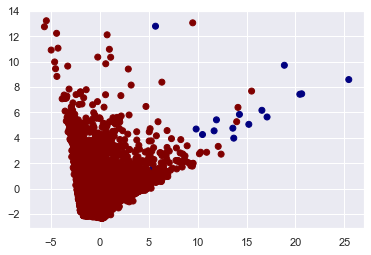

In [47]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# Visualize the predicted training labels versus actual training labels. 
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], c= pred6, cmap = 'jet')
plt.show()
###################end code for Task 2-b

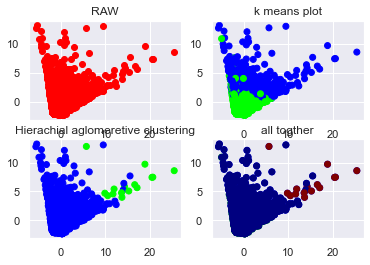

In [48]:
# task 3
#pred3, y_kmeans1, x_training_data.iloc[:, 0] + x_training_data.iloc[:, 1]
figure, axis = plt.subplots(2, 2)

# For x_training_data.iloc[:, 0] + x_training_data.iloc[:, 1]
axis[0, 0].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], color = 'red')
axis[0, 0].set_title("RAW")
  
# For y_kmeans1
axis[0, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=y_kmeans1, cmap = 'brg')
axis[0, 1].set_title("k means plot")
  
# For pred3
axis[1, 0].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=pred3, cmap = 'brg')
axis[1, 0].set_title("Hierachial aglomeretive clustering")

#for kmeans and hierachical aglomeretive clustering
axis[1, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=y_kmeans1, cmap = 'brg')
axis[1, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=pred3, cmap = 'jet')
axis[1, 1].set_title("all togther")

# Combine all the operations and display
plt.show()

# Models for dataset3 (clusteringdata.csv)

In [50]:
data3 = pandas.read_csv('C:/Users/divya/Downloads/Project/clusteringdata.csv')
data3.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [52]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              5000 non-null   int64 
 1   WorkClass        5000 non-null   object
 2   Fnlwght          5000 non-null   int64 
 3   Education        5000 non-null   object
 4   EducationNumber  5000 non-null   int64 
 5   MaritalStatus    5000 non-null   object
 6   Occupation       5000 non-null   object
 7   Relationship     5000 non-null   object
 8   Race             5000 non-null   object
 9   Sex              5000 non-null   object
 10  CapitalGain      5000 non-null   int64 
 11  CapitalLoss      5000 non-null   int64 
 12  HoursPerWeek     5000 non-null   int64 
 13  NativeCountry    5000 non-null   object
 14  Class            5000 non-null   object
dtypes: int64(6), object(9)
memory usage: 586.1+ KB


In [53]:
from sklearn.preprocessing import LabelEncoder
data3['WorkClass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [54]:
label_encoder = LabelEncoder()
 
# Encode labels in column 'species'.
data3['WorkClass']= label_encoder.fit_transform(data3['WorkClass'])
 
data3['WorkClass'].unique()

array([6, 5, 3, 1, 2, 0, 4, 7])

In [55]:
data3['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [56]:
data3['Education']= label_encoder.fit_transform(data3['Education'])
 
data3['Education'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [57]:
data3 ['MaritalStatus'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [58]:
data3['MaritalStatus']= label_encoder.fit_transform(data3['Education'])
 
data3['MaritalStatus'].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2],
      dtype=int64)

In [59]:
data3['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [60]:
data3['Occupation']= label_encoder.fit_transform(data3['Occupation'])
 
data3['Occupation'].unique()

array([ 1,  4,  6, 10,  8, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [61]:
data3['Relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [62]:
data3['Relationship']= label_encoder.fit_transform(data3['Relationship'])
 
data3['Relationship'].unique()

array([1, 0, 5, 3, 4, 2])

In [63]:
data3['Race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [64]:
data3['Race']= label_encoder.fit_transform(data3['Race'])
 
data3['Race'].unique()

array([4, 2, 1, 0, 3])

In [65]:
data3['Sex'].unique()

array([' Male', ' Female'], dtype=object)

In [66]:
data3['Sex']= label_encoder.fit_transform(data3['Sex'])
 
data3['Sex'].unique()

array([1, 0])

In [67]:
data3['NativeCountry'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland'], dtype=object)

In [68]:
data3['NativeCountry']= label_encoder.fit_transform(data3['NativeCountry'])
 
data3['NativeCountry'].unique()

array([37,  5, 21, 17,  0, 24, 33, 31, 15,  9,  2, 11, 18, 28, 20, 29,  4,
        1, 35,  7, 23, 34, 14, 30,  6,  8, 10, 13,  3, 22, 39, 27, 26, 32,
       36, 12, 25, 38, 16, 19])

In [69]:
data3['Class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [70]:
data3['Class']= label_encoder.fit_transform(data3['Class'])
 
data3['Class'].unique()

array([0, 1])

In [71]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              5000 non-null   int64
 1   WorkClass        5000 non-null   int32
 2   Fnlwght          5000 non-null   int64
 3   Education        5000 non-null   int32
 4   EducationNumber  5000 non-null   int64
 5   MaritalStatus    5000 non-null   int64
 6   Occupation       5000 non-null   int32
 7   Relationship     5000 non-null   int32
 8   Race             5000 non-null   int32
 9   Sex              5000 non-null   int32
 10  CapitalGain      5000 non-null   int64
 11  CapitalLoss      5000 non-null   int64
 12  HoursPerWeek     5000 non-null   int64
 13  NativeCountry    5000 non-null   int32
 14  Class            5000 non-null   int32
dtypes: int32(8), int64(7)
memory usage: 429.8 KB


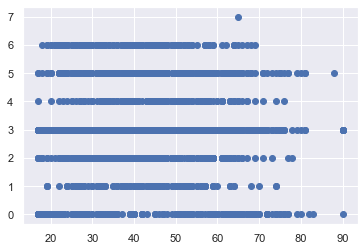

In [134]:
plt.scatter(data3.iloc[:, 0],data3.iloc[:, 1])
plt.show()

In [135]:
x = data3.iloc[:,0:15] # 1t for rows and second for columns
x

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,6,77516,9,13,9,1,1,4,1,2174,0,40,37,0
1,50,5,83311,9,13,9,4,0,4,1,0,0,13,37,0
2,38,3,215646,11,9,11,6,1,4,1,0,0,40,37,0
3,53,3,234721,1,7,1,6,0,2,1,0,0,40,37,0
4,28,3,338409,9,13,9,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,43,3,222971,4,3,4,7,4,4,0,0,0,40,24,0
4996,31,3,259425,11,9,11,3,0,4,1,0,0,40,37,1
4997,47,4,212120,11,9,11,3,0,4,1,0,0,40,37,1
4998,26,3,245880,11,9,11,1,1,4,1,0,0,60,37,0


Text(0, 0.5, 'WCSS')

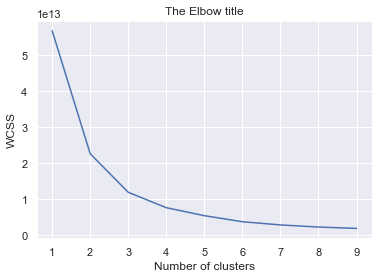

In [136]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#1-a done (determining the k value by elbow method)

In [137]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data = train_test_split(data3, test_size = 0.3, random_state = 2022)
x_test_data
#1-b-1 completed

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
3419,39,3,346478,15,10,15,4,1,4,1,0,0,45,37,0
178,18,3,183930,11,9,11,8,3,4,1,0,0,12,37,0
3721,38,3,112561,9,13,9,4,0,4,1,0,0,55,37,1
3087,46,2,102076,11,9,11,1,4,4,0,0,0,25,37,0
3685,51,3,53197,11,9,11,3,0,4,1,0,0,40,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,57,2,268252,11,9,11,1,4,4,0,0,0,62,37,0
3407,52,3,117674,15,10,15,4,0,4,1,0,0,40,37,1
527,74,3,99183,15,10,15,1,1,4,0,0,0,9,37,0
4379,17,2,191910,1,7,1,12,3,4,1,0,0,20,37,0


In [138]:
x = x_training_data.iloc[:,0:15] # 1t for rows and second for columns
x
#kmeans model creation
kmeans = KMeans(n_clusters = 2)
kmeans.fit_predict(x.drop('Class', axis=1))

array([1, 1, 1, ..., 0, 1, 0])

In [139]:
means=kmeans.cluster_centers_
print(means)

[[3.67935010e+01 2.95178197e+00 3.23029547e+05 1.00702306e+01
  9.76519916e+00 1.00702306e+01 6.82389937e+00 1.45911950e+00
  3.60167715e+00 7.06498952e-01 9.44044025e+02 9.19308176e+01
  4.02012579e+01 3.42830189e+01]
 [3.97572663e+01 3.00432050e+00 1.39723087e+05 1.03334643e+01
  1.01751767e+01 1.03334643e+01 6.47486253e+00 1.41948154e+00
  3.66142969e+00 6.69677926e-01 1.14715043e+03 9.43550668e+01
  4.07073841e+01 3.48719560e+01]]


In [140]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
x['Cluster'] = x['Class'].apply(converter)
x.head(1)

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class,Cluster
43,49,3,94638,11,9,11,1,4,4,0,0,0,40,37,0,0


In [141]:
x.Class.value_counts()

0    2632
1     868
Name: Class, dtype: int64

In [142]:
labels = kmeans.labels_
print(len(labels))

3500


In [143]:
# 1-b-4 Confusion Metrix and confusion report of the prediction

from sklearn.metrics import confusion_matrix,classification_report
print("ConfusionMatrix",confusion_matrix(x['Cluster'],labels))
print(classification_report(x['Cluster'],labels))

ConfusionMatrix [[ 952 2548]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.27      0.43      3500
           1       0.00      0.00      0.00         0

    accuracy                           0.27      3500
   macro avg       0.50      0.14      0.21      3500
weighted avg       1.00      0.27      0.43      3500



C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


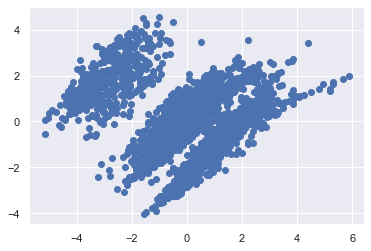

In [144]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train_pca_St = StandardScaler().fit_transform(x)
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
principlecCom = pca.fit_transform(x_train_pca_St)

#Save components to a DataFrame
x_train_pca = pandas.DataFrame(principlecCom)

# x_train_pca
# x_train_pca[1]

x = x_train_pca.iloc[:, 0]
y = x_train_pca.iloc[:, 1]

plt.scatter(x, y)

plt.show()


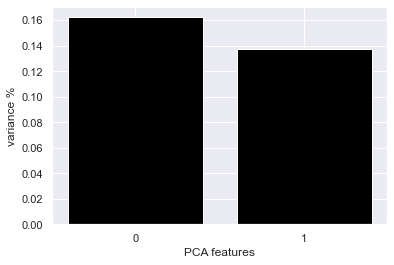

In [145]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

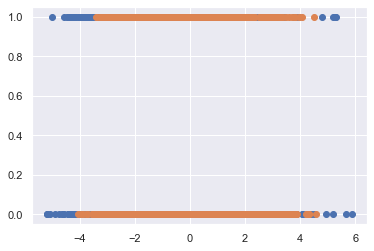

In [146]:
plt.scatter(x_train_pca[0],y_kmeans1)
plt.scatter(x_train_pca[1],y_kmeans1)
plt.show()

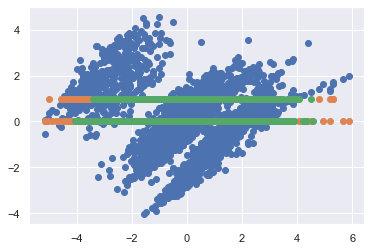

In [147]:
x = x_train_pca[0]
y = x_train_pca[1]

plt.scatter(x, y)
plt.scatter(x_train_pca[0],y_kmeans1)
plt.scatter(x_train_pca[1],y_kmeans1)

plt.show()


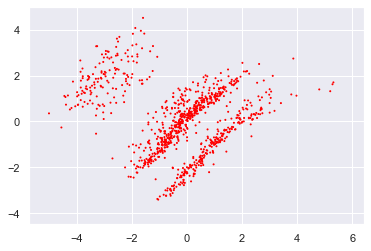

In [149]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], y_kmeans1, color='red')
plt.show()

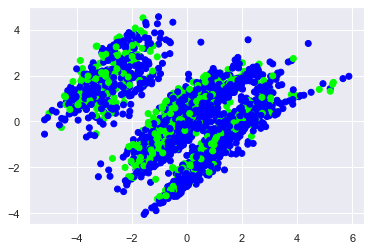

In [150]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1],c=y_kmeans1, cmap = 'brg')
plt.show()

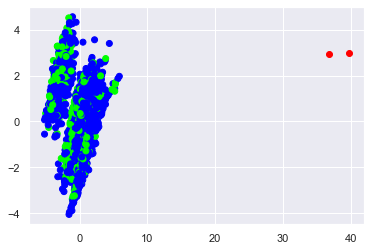

In [154]:
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1],c=y_kmeans1, cmap = 'brg')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red');
plt.show()

In [155]:
y = x_test_data.iloc[:,1:13] # 1t for rows and second for columns
y

y_kmeans_test1 = kmeans.fit_predict(y)
print(len(y_kmeans_test1))
print(len(y_kmeans1))

1500
3500


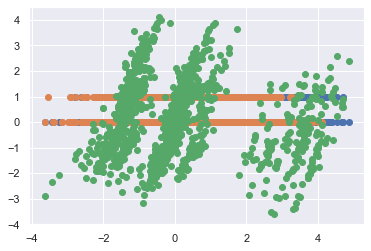

In [156]:
x_test_pca_St = StandardScaler().fit_transform(y)
# Model and fit the data to the PCA model
pca = PCA(n_components=2)
principlecCom1 = pca.fit_transform(x_test_pca_St)

# features = range(pca.n_components_)
# plt.bar(features, pca.explained_variance_ratio_, color='black')
# plt.xlabel('PCA features')
# plt.ylabel('variance %')
# plt.xticks(features)
#Save components to a DataFrame
x_test_pca = pandas.DataFrame(principlecCom1)

# x_train_pca
# x_train_pca[1]

x = x_test_pca[0]
y = x_test_pca[1]

plt.scatter(x_test_pca[0],y_kmeans_test1)
plt.scatter(x_test_pca[1],y_kmeans_test1)
plt.scatter(x, y)

plt.show()

#1-b-2 completed


In [172]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
x = x_training_data.iloc[:,0:15] # 1t for rows and second for columns
x

## Calculate pairwise distance matrix for X_train
pdm_train = pairwise_distances(x, metric='euclidean', n_jobs=1)
pdm_train = pairwise_distances(x, metric='cosine', n_jobs=1)
pdm_train = pairwise_distances(x, metric='manhattan', n_jobs=1)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cluster1 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')  
pred1 = cluster1.fit_predict(x.drop('Class', axis=1))

def converter(cluster1):
    if cluster1=='Yes':
        return 1
    else:
        return 0
x['Cluster1'] = x['Class'].apply(converter)

f1_score_1 = classification_report(x['Cluster1'],cluster1.labels_)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean

cluster2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
pred2 = cluster2.fit_predict(x.drop('Class', axis=1))
def converter(cluster2):
    if cluster2=='Yes':
        return 1
    else:
        return 0
x['Cluster2'] = x['Class'].apply(converter)

f1_score_2 = classification_report(x['Cluster2'],cluster2.labels_)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
cluster3 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete')  
pred3 = cluster3.fit_predict(x.drop('Class', axis=1))
def converter(cluster3):
    if cluster3=='Yes':
        return 1
    else:
        return 0
x['Cluster3'] = x['Class'].apply(converter)

f1_score_3 = classification_report(x['Cluster3'],cluster3.labels_)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')  
pred4 = cluster4.fit_predict(x.drop('Class', axis=1))
def converter(cluster4):
    if cluster4=='Yes':
        return 1
    else:
        return 0
x['Cluster4'] = x['Class'].apply(converter)

f1_score_4 = classification_report(x['Cluster4'],cluster4.labels_)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
cluster5 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
pred5 = cluster5.fit_predict(x.drop('Class', axis=1))
def converter(cluster5):
    if cluster5=='Yes':
        return 1
    else:
        return 0
x['Cluster5'] = x['Class'].apply(converter)

f1_score_5 = classification_report(x['Cluster5'],cluster5.labels_)

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
cluster6 = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')  
pred6 = cluster6.fit_predict(x.drop('Class', axis = 1))
def converter(cluster6):
    if cluster6=='Yes':
        return 1
    else:
        return 0
x['Cluster6'] = x['Class'].apply(converter)

f1_score_6 = classification_report(x['Cluster6'],cluster6.labels_)

print(f1_score_1)
print(f1_score_2)
print(f1_score_3)
print(f1_score_4)
print(f1_score_5)
print(f1_score_6)
###################end code for Task 2-a

C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Ro

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3500
           1       0.00      0.00      0.00         0

    accuracy                           1.00      3500
   macro avg       0.50      0.50      0.50      3500
weighted avg       1.00      1.00      1.00      3500

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3500
           1       0.00      0.00      0.00         0

    accuracy                           0.99      3500
   macro avg       0.50      0.50      0.50      3500
weighted avg       1.00      0.99      1.00      3500

              precision    recall  f1-score   support

           0       1.00      0.01      0.03      3500
           1       0.00      0.00      0.00         0

    accuracy                           0.01      3500
   macro avg       0.50      0.01      0.01      3500
weighted avg       1.00      0.01      0.03      3500

              preci

C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\divya\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


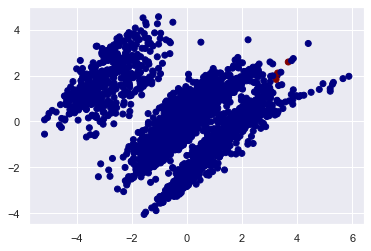

In [173]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
# Visualize the predicted training labels versus actual training labels. 
plt.scatter(x_train_pca.iloc[: , 0], x_train_pca.iloc[:, 1], c= pred1, cmap = 'jet')
plt.show()
###################end code for Task 2-b

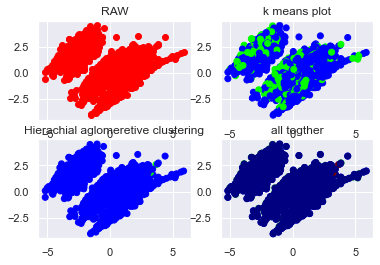

In [175]:
# task 3
#pred3, y_kmeans1, x_training_data.iloc[:, 0] + x_training_data.iloc[:, 1]
figure, axis = plt.subplots(2, 2)

# For x_training_data.iloc[:, 0] + x_training_data.iloc[:, 1]
axis[0, 0].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], color = 'red')
axis[0, 0].set_title("RAW")
  
# For y_kmeans1
axis[0, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=y_kmeans1, cmap = 'brg')
axis[0, 1].set_title("k means plot")
  
# For pred3
axis[1, 0].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=pred1, cmap = 'brg')
axis[1, 0].set_title("Hierachial aglomeretive clustering")

#for kmeans and hierachical aglomeretive clustering
axis[1, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=y_kmeans1, cmap = 'brg')
axis[1, 1].scatter(x_train_pca.iloc[:, 0], x_train_pca.iloc[:, 1], c=pred1, cmap = 'jet')
axis[1, 1].set_title("all togther")

# Combine all the operations and display
plt.show()

In [ ]:
#print out the confusion metrix of the kmeans and the HAC
